Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
SVM             DM       0.9574      0.9249      0.9221           0.9590           0.9406
SVM             CG       0.9249      0.9574      0.9590           0.9221          


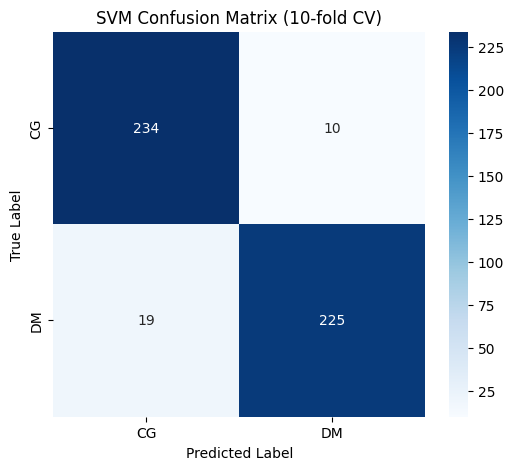

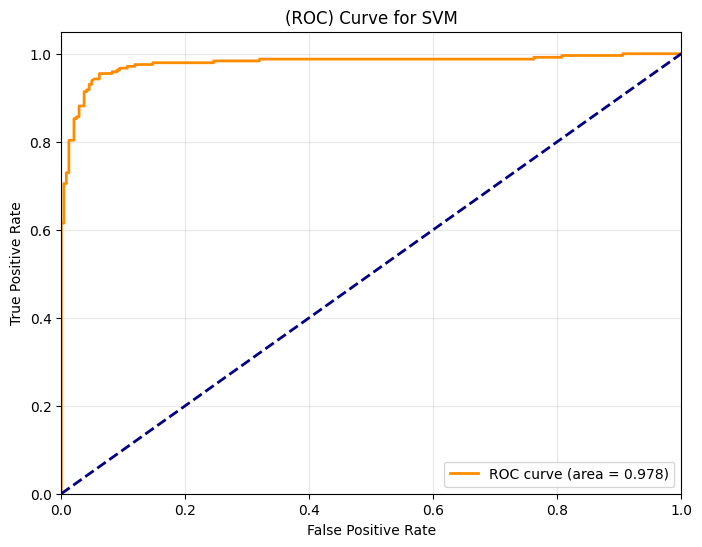

Area Under the ROC Curve (AUC): 0.9783


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load the dataset
csv_path = "/content/balanced_dataset_FULL_FOOT_SIFT1.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define SVM and parameter grid for Grid Search
svm = SVC(probability=True)
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'kernel': ['linear', 'rbf'], # Kernel type
    'gamma': ['scale', 'auto']   # Kernel coefficient for 'rbf'
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Use accuracy as the scoring metric
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_svm = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(best_svm, X_scaled, y, cv=cv)

# Get probability predictions for ROC curve
y_prob = cross_val_predict(best_svm, X_scaled, y, cv=cv, method='predict_proba')[:, 1]

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'SVM':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'SVM':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("SVM Confusion Matrix (10-fold CV)")
plt.show()

 #Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"Area Under the ROC Curve (AUC): {roc_auc:.4f}")



Fitting 10 folds for each of 16 candidates, totalling 160 fits


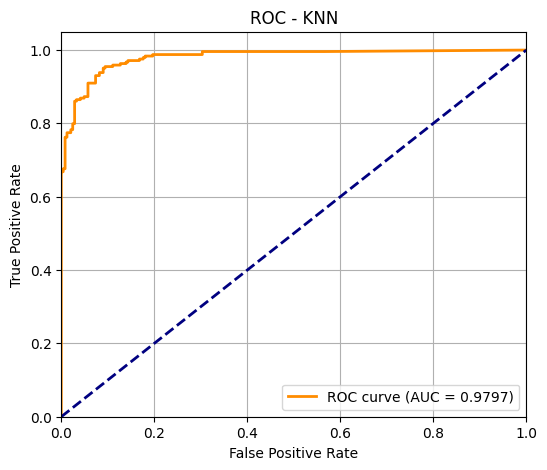

Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
KNN             DM       0.9591      0.8769      0.8648           0.9631           0.9139
KNN             CG       0.8769      0.9591      0.9631           0.8648          


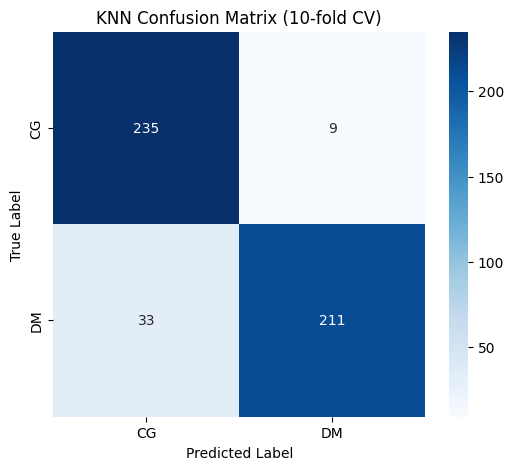

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load the dataset
csv_path = "/content/balanced_dataset_FULL_FOOT_SIFT1.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define KNN and parameter grid for Grid Search
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # You can adjust this range
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_knn = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_knn, X_scaled, y, cv=cv)

# --- Get probability predictions for ROC curve (using KNN) ---
y_probs_knn = cross_val_predict(best_knn, X_scaled, y, cv=cv, method='predict_proba')[:, 1]

# --- ROC curve and AUC calculation for KNN ---
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y, y_probs_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# --- Plot ROC curve for KNN ---
plt.figure(figsize=(6, 5))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - KNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'KNN':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'KNN':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Confusion Matrix (10-fold CV)")
plt.show()


Performing grid search for sigma parameter...
Sigma = 0.1: Accuracy = 0.9160
Sigma = 0.5: Accuracy = 0.9201
Sigma = 1.0: Accuracy = 0.9098
Sigma = 2.0: Accuracy = 0.8484

Best sigma value: 0.5 (Accuracy: 0.9201)


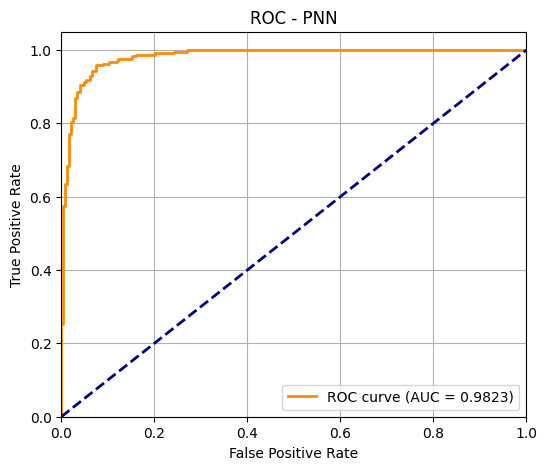


Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
PNN             DM       0.9638      0.8839      0.8730           0.9672           0.9201
PNN             CG       0.8839      0.9638      0.9672           0.8730          


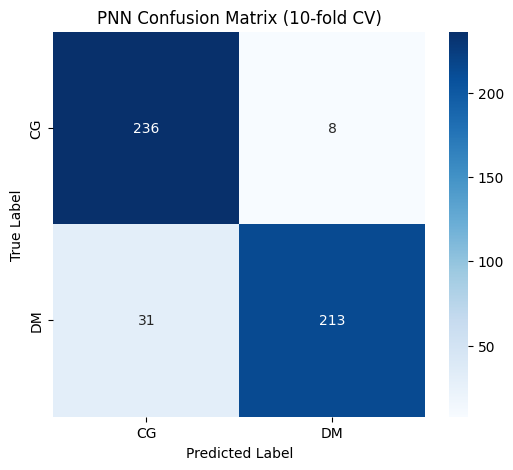

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import roc_curve, auc, roc_auc_score
warnings.filterwarnings('ignore')  # Suppress warnings

# --- Improved PNN implementation with scikit-learn compatibility ---
class PNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, sigma=1.0):
        self.sigma = sigma
        self.X_train = None
        self.y_train = None
        self.classes_ = None

    def fit(self, X, y):
        # Store training data and class labels
        self.X_train = X
        self.y_train = y
        self.classes_ = np.unique(y)
        return self

    def _gaussian_kernel(self, x, centers):
        # Vectorized implementation for better performance
        squared_distance = np.sum((centers - x) ** 2, axis=1)
        return np.exp(-squared_distance / (2 * self.sigma ** 2))

    def predict_proba(self, X):
        if self.X_train is None or self.y_train is None:
            raise ValueError("Model not fitted yet.")

        n_samples = X.shape[0]
        n_classes = len(self.classes_)
        proba = np.zeros((n_samples, n_classes))

        for i, x in enumerate(X):
            class_scores = []
            for j, c in enumerate(self.classes_):
                # Get samples for current class
                Xc = self.X_train[self.y_train == c]
                if len(Xc) == 0:
                    score = 0
                else:
                    # Calculate kernel values for all samples of current class
                    score = np.sum(self._gaussian_kernel(x, Xc))
                class_scores.append(score)

            # Normalize scores to get probabilities
            total_score = sum(class_scores)
            if total_score > 0:
                proba[i] = np.array(class_scores) / total_score
            else:
                # If all scores are 0, assign equal probability
                proba[i] = np.ones(n_classes) / n_classes

        return proba

    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

# --- Data loading and preprocessing ---
try:
    csv_path = "/content/balanced_dataset_FULL_FOOT_SIFT1.xlsx"  # Update with your file path
    df = pd.read_excel(csv_path)

    if "label" not in df.columns:
        raise ValueError("Dataset must have a 'label' column for classification.")

    X = df.drop(columns=["label"])
    y = df["label"].astype(int)

    # Check for missing values
    if X.isnull().values.any():
        print("Warning: Dataset contains missing values. Filling with zeros.")
        X = X.fillna(0)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Define cross-validation
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Grid search for sigma
    param_grid = {'sigma': [0.1, 0.5, 1.0, 2.0]}
    best_sigma = None
    best_score = 0

    print("Performing grid search for sigma parameter...")
    for sigma in param_grid['sigma']:
        pnn = PNNClassifier(sigma=sigma)
        preds = cross_val_predict(pnn, X_scaled, y, cv=cv)
        score = accuracy_score(y, preds)
        print(f"Sigma = {sigma}: Accuracy = {score:.4f}")
        if score > best_score:
            best_score = score
            best_sigma = sigma

    print(f"\nBest sigma value: {best_sigma} (Accuracy: {best_score:.4f})")

    # Final cross-validated predictions with best sigma
    final_pnn = PNNClassifier(sigma=best_sigma)
    y_pred = cross_val_predict(final_pnn, X_scaled, y, cv=cv)

    # Get probability predictions for ROC curve (using PNN)
    final_pnn = PNNClassifier(sigma=best_sigma)
    y_probs = cross_val_predict(final_pnn, X_scaled, y, cv=cv, method='predict_proba')[:, 1]

# Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y, y_probs)
    roc_auc = auc(fpr, tpr)

# Plot ROC curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC - PNN')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


    # --- Metrics calculation ---
    conf_matrix = confusion_matrix(y, y_pred)

    if conf_matrix.shape == (2, 2):  # Binary classification case
        tn, fp, fn, tp = conf_matrix.ravel()
        accuracy = accuracy_score(y, y_pred)

        # For DM (class 1)
        ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
        npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
        sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

        # For CG (class 0)
        ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
        npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
        sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

        # --- Print results ---
        print("\nBest classification performance measures for the features (10-fold CV, Grid Search).")
        print("-" * 100)
        print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
        print("-" * 100)
        print(f"{'PNN':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
        print(f"{'PNN':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

        # --- Confusion matrix plot ---
        plt.figure(figsize=(6, 5))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title("PNN Confusion Matrix (10-fold CV)")
        plt.show()
    else:
        print(f"Error: Expected 2x2 confusion matrix for binary classification, got {conf_matrix.shape}")
        print("Confusion Matrix:")
        print(conf_matrix)

except FileNotFoundError:
    print(f"Error: File not found at path {csv_path}")
    print("Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {str(e)}")
    import traceback
    traceback.print_exc()


Fitting 10 folds for each of 81 candidates, totalling 810 fits
Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
DT              DM       0.8765      0.8987      0.9016           0.8730           0.8873
DT              CG       0.8987      0.8765      0.8730           0.9016          


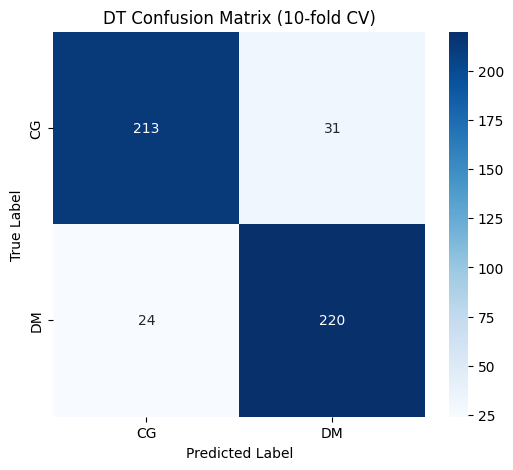

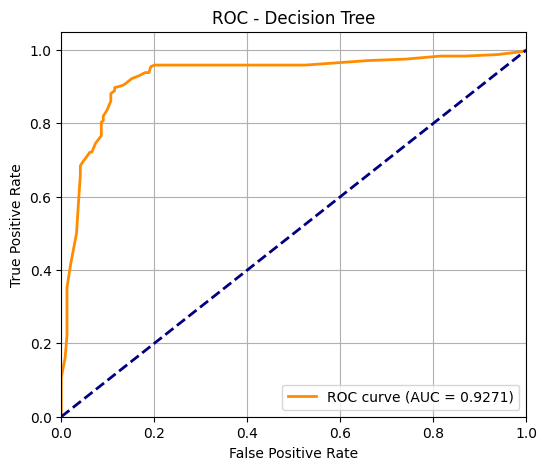

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load the dataset
csv_path = "/content/balanced_dataset_FULL_FOOT_SIFT1.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Decision Tree and parameter grid for Grid Search
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_dt = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_dt, X_scaled, y, cv=cv)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'DT':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'DT':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("DT Confusion Matrix (10-fold CV)")
plt.show()


#Get probability predictions for ROC curve (using Decision Tree)
y_probs = cross_val_predict(best_dt, X_scaled, y, cv=cv, method='predict_proba')[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Decision Tree') # Changed title
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Fitting 10 folds for each of 135 candidates, totalling 1350 fits


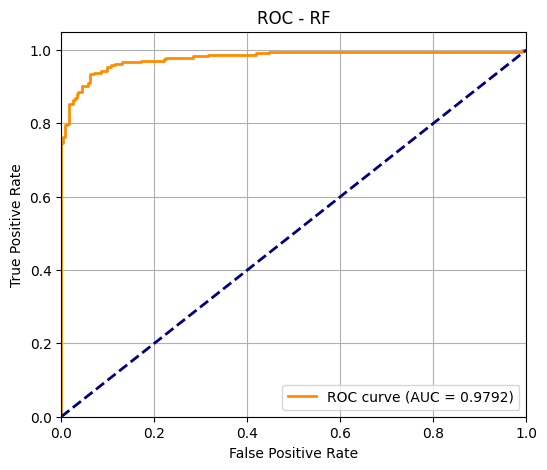

Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
RF              DM       0.9383      0.9347      0.9344           0.9385           0.9365
RF              CG       0.9347      0.9383      0.9385           0.9344          


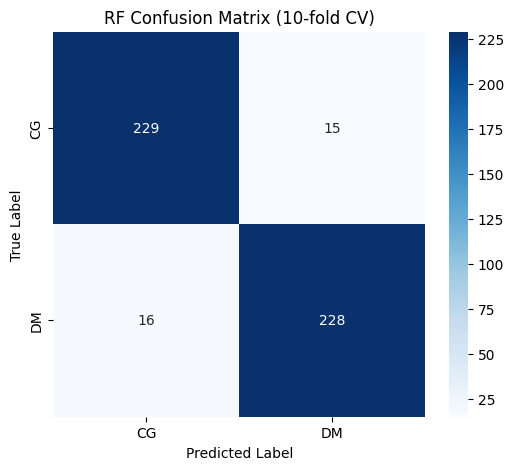

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load the dataset
csv_path = "/content/balanced_dataset_FULL_FOOT_SIFT1.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define Random Forest and parameter grid for Grid Search
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_rf = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_rf, X_scaled, y, cv=cv)

# --- Get probability predictions for ROC curve (using RF) ---
y_probs_rf = cross_val_predict(best_rf, X_scaled, y, cv=cv, method='predict_proba')[:, 1]

# --- ROC curve and AUC calculation for RF ---
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y, y_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# --- Plot ROC curve for RF ---
plt.figure(figsize=(6, 5))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - RF')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'RF':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'RF':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("RF Confusion Matrix (10-fold CV)")
plt.show()


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


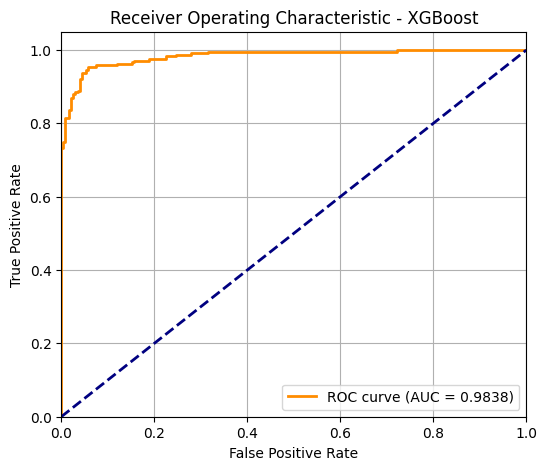

Best classification performance measures for the features (10-fold CV, Grid Search).
----------------------------------------------------------------------------------------------------
Classifier      Class    PPV        NPV        Sensitivity     Specificity     Accuracy  
----------------------------------------------------------------------------------------------------
XGBoost         DM       0.9540      0.9357      0.9344           0.9549           0.9447
XGBoost         CG       0.9357      0.9540      0.9549           0.9344          


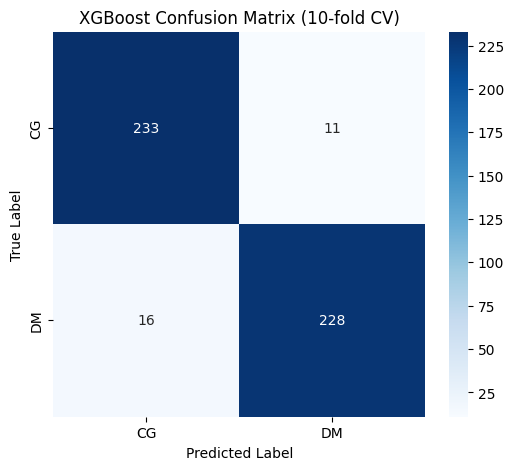

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Load the dataset
csv_path = "/content/balanced_dataset_FULL_FOOT_SIFT1.xlsx"  # Update with your file path
df = pd.read_excel(csv_path)

# Ensure dataset has labels
if "label" not in df.columns:
    raise ValueError("Dataset must have a 'label' column for classification.")

# Separate features and labels
X = df.drop(columns=["label"])
y = df["label"].astype(int)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define XGBoost and parameter grid for Grid Search
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [3,5,7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# 10-fold stratified cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best estimator from grid search
best_xgb = grid_search.best_estimator_

# Cross-validated predictions (for metrics)
y_pred = cross_val_predict(best_xgb, X_scaled, y, cv=cv)

# --- Get probability predictions for ROC curve (using XGBoost) ---
y_probs_xgb = cross_val_predict(best_xgb, X_scaled, y, cv=cv, method='predict_proba')[:, 1]

# --- ROC curve and AUC calculation for XGBoost ---
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y, y_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# --- Plot ROC curve for XGBoost ---
plt.figure(figsize=(6, 5))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - XGBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y, y_pred)
tn, fp, fn, tp = conf_matrix.ravel()
accuracy = accuracy_score(y, y_pred)

# Metrics for DM (class 1)
ppv_dm = tp / (tp + fp) if (tp + fp) > 0 else 0
npv_dm = tn / (tn + fn) if (tn + fn) > 0 else 0
sensitivity_dm = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity_dm = tn / (tn + fp) if (tn + fp) > 0 else 0

# Metrics for CG (class 0)
ppv_cg = tn / (tn + fn) if (tn + fn) > 0 else 0
npv_cg = tp / (tp + fp) if (tp + fp) > 0 else 0
sensitivity_cg = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_cg = tp / (tp + fn) if (tp + fn) > 0 else 0

# Print results in tabular format
print("Best classification performance measures for the features (10-fold CV, Grid Search).")
print("-" * 100)
print(f"{'Classifier':<15} {'Class':<8} {'PPV':<10} {'NPV':<10} {'Sensitivity':<15} {'Specificity':<15} {'Accuracy':<10}")
print("-" * 100)
print(f"{'XGBoost':<15} {'DM':<8} {ppv_dm:.4f}{'':<5} {npv_dm:.4f}{'':<5} {sensitivity_dm:.4f}{'':<10} {specificity_dm:.4f}{'':<10} {accuracy:.4f}")
print(f"{'XGBoost':<15} {'CG':<8} {ppv_cg:.4f}{'':<5} {npv_cg:.4f}{'':<5} {sensitivity_cg:.4f}{'':<10} {specificity_cg:.4f}{'':<10}")

# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["CG", "DM"], yticklabels=["CG", "DM"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Confusion Matrix (10-fold CV)")
plt.show()
